<a href="https://colab.research.google.com/github/annms1/Mnist/blob/main/Mnist_multi_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import cv2
# Imporing the mnist dataset
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

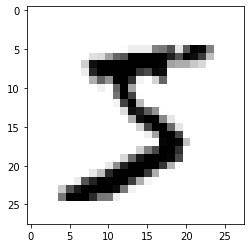

In [4]:
plt.imshow(X_train[0], cmap=plt.cm.binary)

In [5]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(80, activation="relu"),
                             tf.keras.layers.Dense(10, activation="softmax")
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0009),
                metrics=['accuracy'])

history_1 = model_1.fit(X_train, y_train, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 6s 2ms/step - loss: 1.7413 - accuracy: 0.8510
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3540 - accuracy: 0.9163
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2652 - accuracy: 0.9323
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2073 - accuracy: 0.9459
Epoch 5/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1735 - accuracy: 0.9531
Epoch 6/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1443 - accuracy: 0.9599


In [6]:
model_1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1737 - accuracy: 0.9574


[0.17368042469024658, 0.9574000239372253]

## Training the model with the same parameters on the normalized vesion of the data

In [7]:
X_train_normal = X_train/255
X_test_normal = X_test/255

In [8]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(80, activation="relu"),
                               tf.keras.layers.Dense(10, activation="softmax")
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0009),
                metrics=['accuracy'])

history_2 = model_2.fit(X_train_normal, y_train, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2548 - accuracy: 0.9251
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1106 - accuracy: 0.9668
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0766 - accuracy: 0.9762
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0581 - accuracy: 0.9819
Epoch 5/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0459 - accuracy: 0.9856
Epoch 6/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0377 - accuracy: 0.9875


In [9]:
model_2.evaluate(X_test_normal, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0898 - accuracy: 0.9730


[0.08981377631425858, 0.9729999899864197]

#### Preparing the input shape for the cnn

In [10]:
input_shape_t = X_train.shape[1:]
input_shape = list()

In [11]:
for num in input_shape_t:
    input_shape.append(num)
input_shape.append(1)
input_shape = tuple(input_shape)

In [12]:
input_shape

(28, 28, 1)

### In model 3 we will use a convolutional neural network

In [17]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(64, (3, 3), input_shape=input_shape, activation="relu"),
                               tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(80, activation="relu"),
                               tf.keras.layers.Dense(10, activation="softmax")
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.000752),
                metrics=['accuracy'])

history_3 = model_3.fit(X_train_normal, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 13s 3ms/step - loss: 0.1640 - accuracy: 0.9508
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0537 - accuracy: 0.9831
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0361 - accuracy: 0.9884


In [18]:
model_3.evaluate(X_test_normal, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0445 - accuracy: 0.9847


[0.04451299458742142, 0.9847000241279602]

## Trying the best model(model_3) on my handwriting

In [253]:
# Importing the image
file = r"/content/WhatsApp Image 2022-01-16 at 2.08.52 AM.jpeg"

In [254]:
# Reading the image and turning it to grayscale
img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

In [255]:
img.shape

(447, 506)

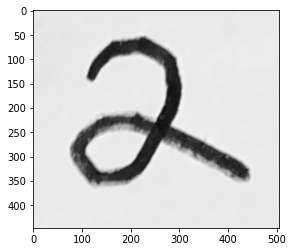

In [256]:
plt.imshow(img, cmap=plt.cm.gray)

In [257]:
# The neural netwrok can only take a specific input which is 1x28x28 in this case so we resize it to 2 dimensions
# not 3 yet because the resize function does not take 3 dims
img = cv2.resize(img, (28, 28))

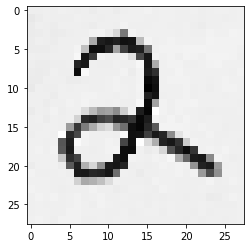

In [258]:
# After resizing
plt.imshow(img, cmap=plt.cm.gray)

### Making the input 1x28x28 and making it the right data type

In [259]:
# Adding the 3rd dimension
img = [img]

In [260]:
# Turning it to an np array
img = np.array(img)

In [261]:
img.shape

(1, 28, 28)

In [262]:
# Normalizing the image
img = img/255

In [263]:
type(img)

numpy.ndarray

In [271]:
if model_3.predict(img).argmax() == 2:
    print("Correct!")
else:
    print("Wrong")

Correct!
